<a href="https://colab.research.google.com/github/BonganiSomba/Machine_Learning_For_Supply_Chain/blob/main/capeAIHometest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import os 
import numpy as np
import pandas as pd
####importing modules  
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install -U imbalanced-learn 
#!pip install -U delayed

import pickle

since we have given train dataset and test dataset, we will work with training set first

In [2]:
df_train_demog = pd.read_csv('traindemographics.csv')  ####demographic dataset
df_train_perf= pd.read_csv('trainperf.csv')            ###### perf
df_train_prev = pd.read_csv('trainprevloans.csv')      ######  prevloann

the next step is to combine this training dataset into one dataframe 

In [49]:
### we merge all the dataset into one dataframe 
from functools import reduce
df = [df_train_demog,df_train_perf,df_train_prev]
df_train = reduce(lambda left,right: pd.merge(left,right,on=['customerid'],
                                              how='outer'),df)

df_train.head(2)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,good_bad_flag,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,301964962.0,2.0,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30.0,8a858899538ddb8e0153a780c56e34bb,Good,301943951.0,1.0,2017-06-19 17:55:26.000000,2017-06-19 16:54:19.000000,10000.0,11500.0,15.0,2017-07-04 18:09:47.000000,8a858899538ddb8e0153a780c56e34bb,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,301972172.0,2.0,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30.0,NaN,Bad,301929966.0,1.0,2017-06-07 12:47:30.000000,2017-06-07 11:46:22.000000,10000.0,13000.0,30.0,2017-07-10 08:52:54.000000,NaN,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000


### Data PreProccessing

##Data exploration


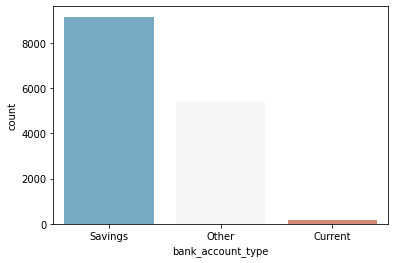

In [54]:
sns.countplot(x='bank_account_type',data=df_train, palette='RdBu_r')

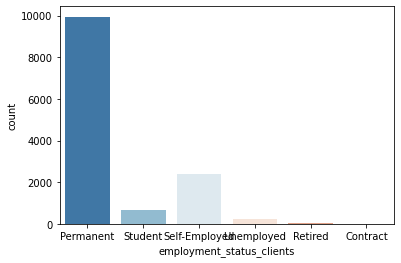

In [62]:
###### we can tell we have higher number of people who are permant 
sns.countplot(x='employment_status_clients',data=df_train, palette='RdBu_r')

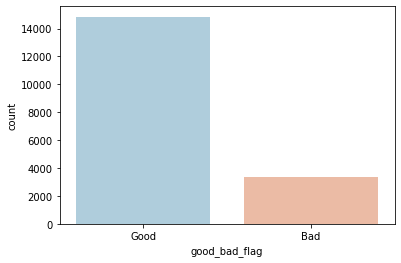

In [64]:
### from the graph we can see that most of our customers have good record of paying in time
sns.countplot(x='good_bad_flag',data=df_train, palette='RdBu_r')

###checking for missing values and solve them

In [68]:
df_train.isnull().sum()

customerid                        0
birthdate                      4514
bank_account_type              4514
longitude_gps                  4514
latitude_gps                   4514
bank_name_clients              4514
bank_branch_clients           19156
employment_status_clients      6032
level_of_education_clients    15670
systemloanid_x                 1069
loannumber_x                   1069
approveddate_x                 1069
creationdate_x                 1069
loanamount_x                   1069
totaldue_x                     1069
termdays_x                     1069
referredby_x                  18253
good_bad_flag                  1069
systemloanid_y                 1078
loannumber_y                   1078
approveddate_y                 1078
creationdate_y                 1078
loanamount_y                   1078
totaldue_y                     1078
termdays_y                     1078
closeddate                     1078
referredby_y                  18253
firstduedate                

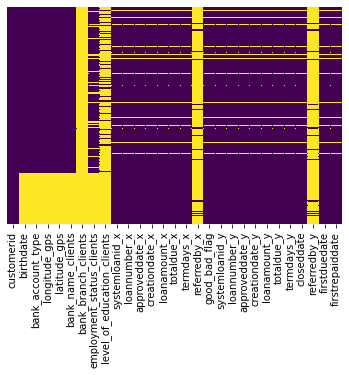

In [70]:

sns.heatmap(df_train.isnull(),yticklabels=False, cbar= False,cmap= 'viridis')

In [ ]:
##### before we could remove or handle the missing values, is best to work with only comlumn we 
# will need to build our model. 



###removing NA's

In [ ]:
##### since our dataset have NUll we will want to work and solve this before we pass Data into the model
## the approuch we will use is interpolation by use of numerical methods. 


new_data = df.interpolate(method='quadratic')
new_data['new_score.fix'] = new_data['new_score']
new_data['last_core.fix'] = new_data['last_core']
new_data.head(7)

In [ ]:
##### plot the graph that will check for any missing values

sns.heatmap(new_data.isnull(),yticklabels=False, cbar= False,cmap= 'viridis')

In [ ]:
##### new_score vs new_score.fix
fig = plt.figure()
ax = fig.add_subplot(111)
df['new_score'].plot(kind='kde', ax=ax)
new_data['last_core.fix'].plot(kind='kde', ax=ax, color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')